# Help of Countries

In [2376]:
# Importing required libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

# To Scale our data
from sklearn.preprocessing import scale

#for PCA and Clustering
import sklearn

#To remove the warnings
import warnings
warnings.filterwarnings('ignore')

In [2377]:
# Reading data for the CarPrice_Assignment file
df=pd.read_csv(r"C:\Apps\Abhinav_Sharma\Abhinav DND\Upgrad\Machine Learning\Clustering and PCA Assignment\Country-data.csv")

In [2378]:
#Viewing the dataframe
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2379]:
#Converting exports,imports and health spending percentages to their real values.
df['exports'] = (df['exports']/100)*df['gdpp']
df['imports'] = (df['imports']/100)*df['gdpp']
df['health'] = (df['health']/100)*df['gdpp']

In [2380]:
#Checking the datatypes of the columns
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [2381]:
#Converting the integer columns to their float counterparts
df.income=df.income.astype(float)
df.gdpp=df.gdpp.astype(float)

In [2382]:
#Checking the dataframe back again
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


#### Primary Checks

In [2383]:
#Checking the number of rows and columns of dataframe
df.shape

(167, 10)

In [2384]:
#Checking the information of the entire dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.1+ KB


In [2385]:
# Checking the statistics of the dataframe df
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [2386]:
# Viewing the columns in the dataframe df
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

#### Check for NA values in 'dataset'

In [2387]:
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
False
0


#### Checking for duplicates in Country Name

In [2388]:
# Creating a list of categorical variables from df
print(df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

There are no duplicates as per visual check and the data frame is good to go

## Visualizations

#### GDPP vs Child Mortality

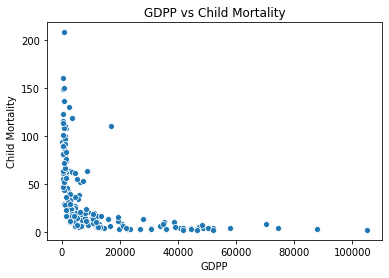

In [2389]:
fig = plt.figure()                                                  #Setting the figure size
plt1=sns.scatterplot(x=df['gdpp'],y=df['child_mort'])               #Creating a scatter plot of gdpp with child mortality
plt.title('GDPP vs Child Mortality')                                #Setting the title of the graph
plt1.set(xlabel = 'GDPP', ylabel= 'Child Mortality')                #Setting the labels for x and y axis of the graphs
plt.show()                                                          #Displaying the graph

For countries with lower GDPP, the Deaths of children under 5 years of age per 1000 live births i.e. Child Mortality increases as they don't have enough resources to spend

#### Imports vs Inflation

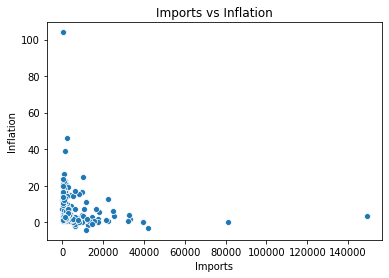

In [2390]:
fig = plt.figure()                                                  #Setting the figure size
plt1=sns.scatterplot(x=df['imports'],y=df['inflation'])             #Creating a scatter plot of Imports with Inflation
plt.title('Imports vs Inflation')                                   #Setting the title of the graph
plt1.set(xlabel = 'Imports', ylabel= 'Inflation')                   #Setting the labels for x and y axis of the graphs
plt.show()                                                          #Displaying the graph

For the rising % age of imports the inflation seems to remain nearly constant. 

#### Exports vs Inflation

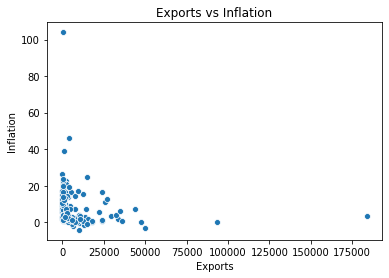

In [2391]:
fig = plt.figure()                                                  #Setting the figure size
plt1=sns.scatterplot(x=df['exports'],y=df['inflation'])             #Creating a scatter plot of Exports with Inflation
plt.title('Exports vs Inflation')                                   #Setting the title of the graph
plt1.set(xlabel = 'Exports', ylabel= 'Inflation')                   #Setting the labels for x and y axis of the graphs
plt.show()                                                          #Displaying the graph

For less amount of exports, the inflation is pretty high

#### Child Mortality vs Total Fertility

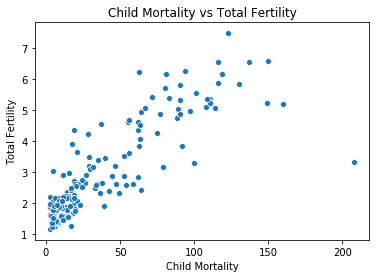

In [2392]:
fig = plt.figure()                                              #Setting the figure size
plt1=sns.scatterplot(x=df['child_mort'],y=df['total_fer'])      #Creating a scatter plot of Child Mortality with Total Fertility
plt.title('Child Mortality vs Total Fertility')                 #Setting the title of the graph
plt1.set(xlabel = 'Child Mortality', ylabel= 'Total Fertility') #Setting the labels for x and y axis of the graphs
plt.show()                                                      #Displaying the graph

As the Fertility increases so does the Child Mortality which shows that as more number of children are taking birth so is the death rate increasing

#### Imports vs Exports

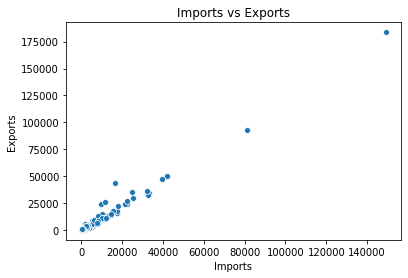

In [2393]:
fig = plt.figure()                                                #Setting the figure size
plt1=sns.scatterplot(x=df['imports'],y=df['exports'])             #Creating a scatter plot of Imports with Exports
plt.title('Imports vs Exports')                                   #Setting the title of the graph
plt1.set(xlabel = 'Imports', ylabel= 'Exports')                   #Setting the labels for x and y axis of the graphs
plt.show()                                                        #Displaying the graph

Imports and Exports both increase together

#### Health vs Exports

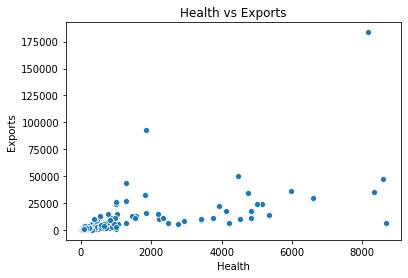

In [2394]:
fig = plt.figure()                                               #Setting the figure size
plt1=sns.scatterplot(x=df['health'],y=df['exports'])             #Creating a scatter plot of Health with Exports
plt.title('Health vs Exports')                                   #Setting the title of the graph
plt1.set(xlabel = 'Health', ylabel= 'Exports')                   #Setting the labels for x and y axis of the graphs
plt.show()                                                       #Displaying the graph

As the exports of a country increase, the health conditions improve

## Factors associated with health

**NOTE**: All the countries shown on the top of each chart are the worst in their categories

#### Child Mortality Rate

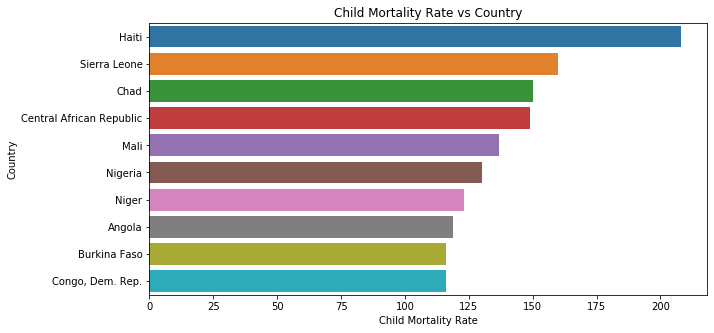

In [2395]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.figure(figsize=(10, 5))                                                                             #Setting the figure size
top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)   #Top 10 child mortality
plt1 = sns.barplot(y='country', x='child_mort', data= top10_child_mort)                                 #Plotting country vs child_mort
plt.title('Child Mortality Rate vs Country')                                                            #Setting graph title
plt1.set(xlabel = 'Child Mortality Rate', ylabel= 'Country')                                             #Setting the x and y labels    
plt.show()

`Haiti` has the highest child mortality rate

#### Health

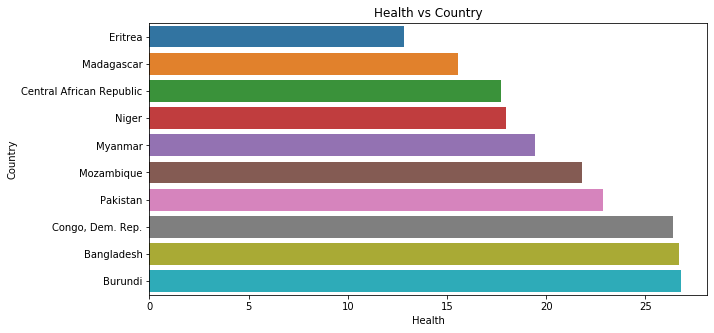

In [2396]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize=(10, 5))                                                                     #Setting the figure size
top10_health = df[['country','health']].sort_values('health', ascending = True).head(10)        #Top 10 health countries
plt1 = sns.barplot(y='country', x='health', data= top10_health)                                 #Plotting Health vs Country
plt.title('Health vs Country')                                                                  #Setting graph title
plt1.set(xlabel = 'Health', ylabel= 'Country')                                                  #Setting the x and y labels    
plt.show()

`Eritrea` is the least in total health spending(%).

#### Life Expectancy

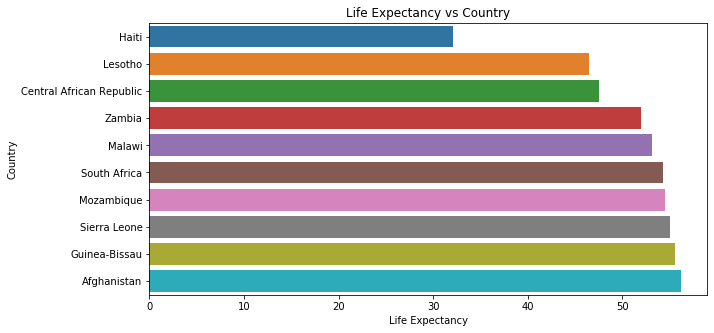

In [2397]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize=(10, 5))                                                                     #Setting the figure size
top10_life = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)  #Top 10 life expectancy countries
plt1 = sns.barplot(y='country', x='life_expec', data= top10_life)                               #Plotting Life Expectancy vs Country
plt.title('Life Expectancy vs Country')                                                         #Setting graph title
plt1.set(xlabel = 'Life Expectancy', ylabel= 'Country')                                         #Setting the x and y labels    
plt.show()

1. `Haiti` has the lowest life expectancy (32%)
2. `Lesotho`, `Central African Republic` and `Zambia` have life expectancies under 50 years

#### Total Fertility

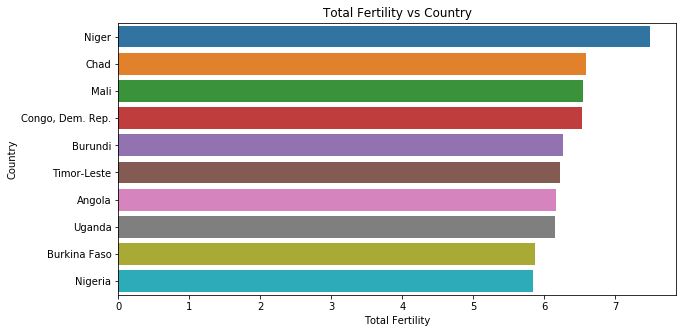

In [2398]:
# Total Fertility : The number of children that would be born to each woman if the current age-fertility rates remain the same.
plt.figure(figsize=(10, 5))                                                                        #Setting the figure size
top10_fertility = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)  #Top 10 Total Fertility countries
plt1 = sns.barplot(y='country', x='total_fer', data= top10_fertility)                              #Plotting Total Fertility vs Country
plt.title('Total Fertility vs Country')                                                            #Setting graph title
plt1.set(xlabel = 'Total Fertility', ylabel= 'Country')                                            #Setting the x and y labels    
plt.show()

`Niger` has the highest number of children born to each woman

## Factors associated with economy

#### Exports

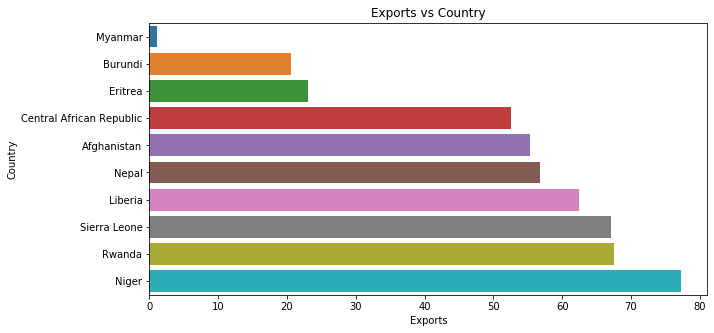

In [2399]:
# Exports : Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize=(10, 5))                                                                  #Setting the figure size
top10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)  #Top 10 Export countries
plt1 = sns.barplot(y='country', x='exports', data= top10_exports)                            #Plotting Exports vs Country
plt.title('Exports vs Country')                                                              #Setting graph title
plt1.set(xlabel = 'Exports', ylabel= 'Country')                                              #Setting the x and y labels    
plt.show()

`Myanmar` has the least exports of good and services with 0.11% of the total GDP

#### Imports - Less

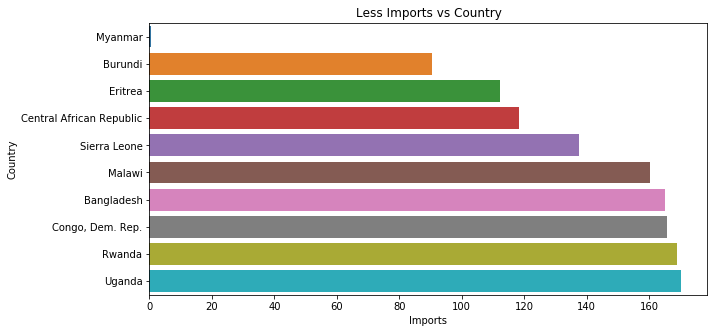

In [2400]:
# Imports Less : Less Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize=(10, 5))                                                                  #Setting the figure size
top10_less_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)  #Top 10 Less Import countries
plt1 = sns.barplot(y='country', x='imports', data= top10_less_imports)                            #Plotting Less Imports vs Country
plt.title('Less Imports vs Country')                                                              #Setting graph title
plt1.set(xlabel = 'Imports', ylabel= 'Country')                                              #Setting the x and y labels    
plt.show()

`Myanmar` has the least imports in % of total GDP which states that it doesn't have access to latest technological advancements in health sector

#### Imports - More

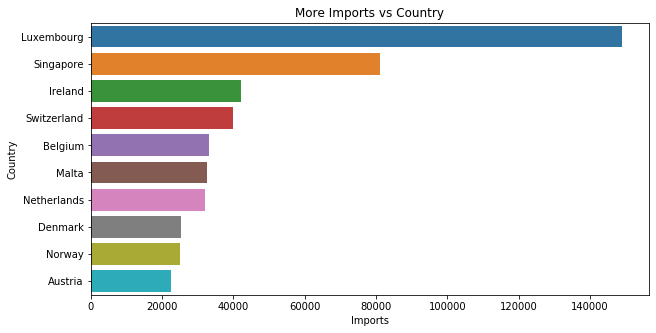

In [2401]:
# Imports More : More Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize=(10, 5))                                                                  #Setting the figure size
top10_more_imports = df[['country','imports']].sort_values('imports', ascending = False).head(10) #Top 10 More Import countries
plt1 = sns.barplot(y='country', x='imports', data= top10_more_imports)                            #Plotting More Imports vs Country
plt.title('More Imports vs Country')                                                         #Setting graph title
plt1.set(xlabel = 'Imports', ylabel= 'Country')                                              #Setting the x and y labels    
plt.show()

`Luxembourg` has the highest imports in % of total GDP which states their higher purchasing power.

#### Inflation

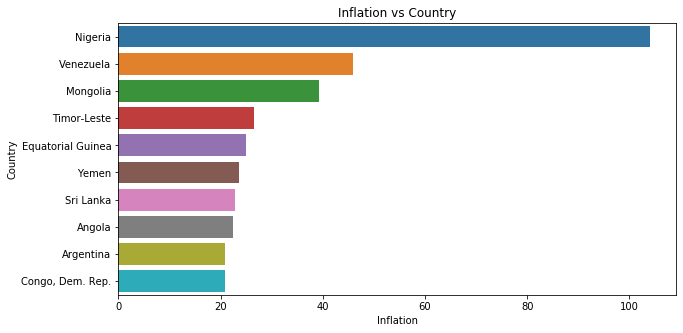

In [2402]:
# Inflation :The measurement of the annual growth rate of the Total GDP
plt.figure(figsize=(10, 5))                                                                  #Setting the figure size
top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)  #Top 10 Inflation countries
plt1 = sns.barplot(y='country', x='inflation', data= top10_inflation)                            #Plotting Inflation vs Country
plt.title('Inflation vs Country')                                                              #Setting graph title
plt1.set(xlabel = 'Inflation', ylabel= 'Country')                                              #Setting the x and y labels    
plt.show()

`Nigeria` has a standout inflation value of 100% which indicates high prices for goods in the country

#### GDPP

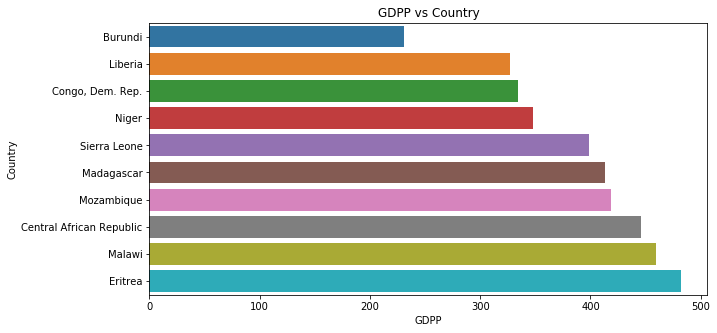

In [2403]:
# The GDP per capita. Calculated as the Total GDP divided by the total population.
plt.figure(figsize=(10, 5))                                                                  #Setting the figure size
top10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)           #Top 10 Low GDPP countries
plt1 = sns.barplot(y='country', x='gdpp', data= top10_gdpp)                                  #Plotting Inflation vs Country
plt.title('GDPP vs Country')                                                                 #Setting graph title
plt1.set(xlabel = 'GDPP', ylabel= 'Country')                                                 #Setting the x and y labels    
plt.show()

`Burundi` has the lowest GDPP among all countries which signifies that the earning capabilities of the individuals are less.

In [2404]:
#creating a copy of df
X=df.copy()

In [2405]:
#Viewing the dataframe X
X.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


## Scaling the data

In [2406]:
#Removing the column country from dataframe X
y = X.pop("country")

In [2407]:
#Importing the necessary library
from sklearn.preprocessing import StandardScaler

#Creating an object scaler to be fitted on the dataframe X
scaler = StandardScaler()

#Fitting and transforming the object scaler on dataframe X
x = scaler.fit_transform(X)

In [2408]:
#Viewing the shape of the dataframe x
x.shape

(167, 9)

In [2409]:
#Viewing the data after scaling
x[:9,]

array([[ 1.29153238e+00, -4.11011304e-01, -5.65039889e-01,
        -4.32275504e-01, -8.08245403e-01,  1.57336225e-01,
        -1.61909203e+00,  1.90288227e+00, -6.79179609e-01],
       [-5.38948897e-01, -3.50190960e-01, -4.39217688e-01,
        -3.13677387e-01, -3.75368896e-01, -3.12347469e-01,
         6.47866431e-01, -8.59972814e-01, -4.85623236e-01],
       [-2.72832734e-01, -3.18525766e-01, -4.84826076e-01,
        -3.53720478e-01, -2.20844469e-01,  7.89274285e-01,
         6.70423231e-01, -3.84043958e-02, -4.65375609e-01],
       [ 2.00780766e+00, -2.91374525e-01, -5.32363186e-01,
        -3.45952541e-01, -5.85043454e-01,  1.38705353e+00,
        -1.17923442e+00,  2.12815103e+00, -5.16268293e-01],
       [-6.95634115e-01, -1.04331462e-01, -1.78770538e-01,
         4.07349911e-02,  1.01731774e-01, -6.01748532e-01,
         7.04258432e-01, -5.41946330e-01, -4.18171341e-02],
       [-5.91177303e-01, -3.05464375e-01, -1.23848715e-01,
        -3.36841425e-01,  8.09204035e-02,  1.244725

Now our data is ready for PCA, lets start!!

## Applying PCA on the data

In [2410]:
#Importing the PCA module
from sklearn.decomposition import PCA

#Creating the object pca with randomization value of 42
pca = PCA(svd_solver='randomized',random_state=42)

#Fitting the object pca on the dataframe X to find out the principal components
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [2411]:
#Viewing the principal components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [2412]:
#Finding the explained variance of each component with the highest variance being first
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

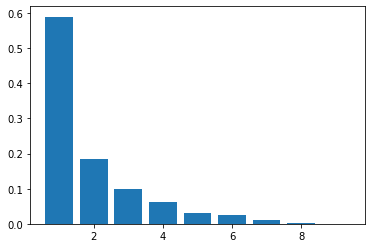

In [2413]:
#Plotting all the variances on a bar chart
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

#### Making the scree plot

In [2414]:
#Finding the cumulative variance by adding each explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

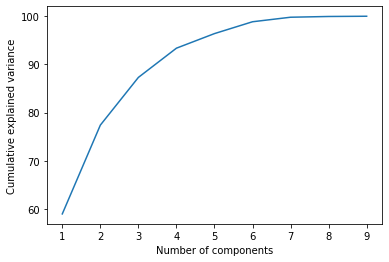

In [2415]:
#Plotting the values of cumulative variances on a plot
plt.plot(range(1,len(var_cumu*100)+1), var_cumu*100)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Hence, taking PCA components = 4 explains close to 95% variance. So we will take the value as 4

#### PCA with 4 components : fitting the dataframe with 4 pca components

In [2416]:
#Creating the object pca2 with randomization value of 42
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#Fitting the object pca2 on the dataframe X to find out the principal components
newdata = pca_final.fit_transform(x)

In [2417]:
#Checking the dimensions of newdata dataframe
newdata.shape

(167, 4)

**Making a dataframe out of it for convenience**

In [2418]:
new_df = pd.DataFrame(newdata, columns=['PC1','PC2','PC3','PC4'])
new_df.head()  #Viewing the dataframe

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [2419]:
#Merging the country column with the new_df (PCA) dataframe
df_final = pd.concat([new_df, y], axis=1)

In [2420]:
#Viewing the datafarme df_final
df_final.head()

,PC1,PC2,PC3,PC4,country
0,-2.636647,1.472085,-0.546500,0.237267,Afghanistan
1,-0.023845,-1.435816,-0.009080,-0.442921,Albania
2,-0.459260,-0.678794,0.967852,-0.176389,Algeria
3,-2.723581,2.176018,0.597794,0.438919,Angola
4,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda


### Correlation Matrix : Checking correlation between the PCA components

In [2421]:
corrmat = np.corrcoef(new_df.transpose())

corrmat.shape

(4, 4)

Plotting the heatmap of the corr matrix

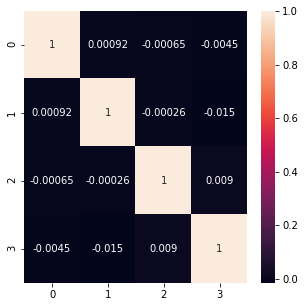

In [2422]:
plt.figure(figsize=[5,5])                             #Setting size
sns.heatmap(corrmat, annot=True)                      #Building the heatmap
plt.show()

From the heatmap we can observe dark shades in black of the principal components which signifies that the variables are independent of each other or not dependent.

## Checking and Treating the Outliers

The developed countries have not been taken into consideration as of now and have been treated for the study. They will be added back in the final dataframe with a suitable cluster label

In [2423]:
#Identifying the float columns from df_final
df_final.select_dtypes(include=['float64']).columns

Index(['PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [2424]:
#Searating the numerical columns out of df_final
num_cols=['PC1', 'PC2', 'PC3', 'PC4']

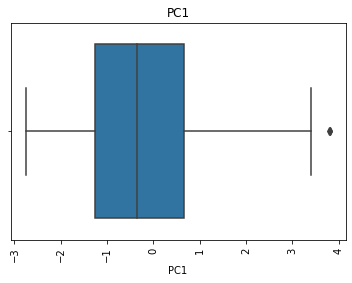

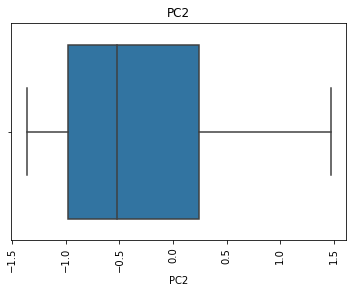

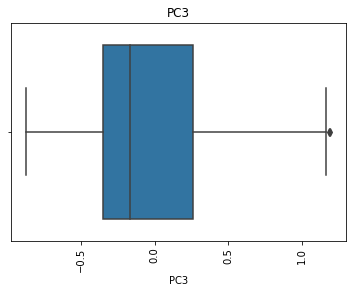

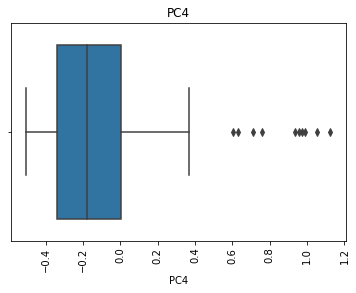

In [2425]:
# Looping through each column of df

for i in num_cols:
    
    # Checking if that column exists inside our numerical columns
    if i in num_cols:
        Q1 = df_final[i].quantile(0.05)        # taking the value of first quantile for each column
        Q3 = df_final[i].quantile(0.95)        # taking the value of third quantile for eah column

        #Treating the main dataframe from outliers
        df_final = df_final[(df_final[i] >= Q1) & (df_final[i] <= Q3)] 
    
        sns.boxplot(df_final[i])                                # creating a box plot for each individual column
        plt.xticks(rotation=90, fontsize=10)                      # rotating the x-axis labels 
        plt.title(' '.join([x for x in i.split('_')]))            # setting the title of the plot       
        plt.show()                                                # displaying the plot

In [2426]:
#Viewing the dimensions of the dataframe df_final after outlier treatment
df_final.shape

(107, 5)

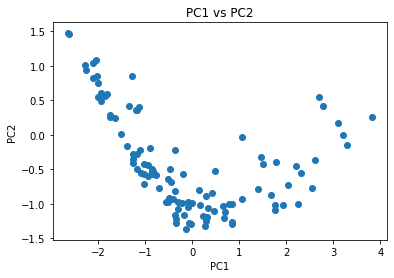

In [2427]:
fig = plt.figure()   
plt.scatter(x=df_final['PC1'],y=df_final['PC2'])
plt.title('PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Plotting the data

<Figure size 360x216 with 0 Axes>

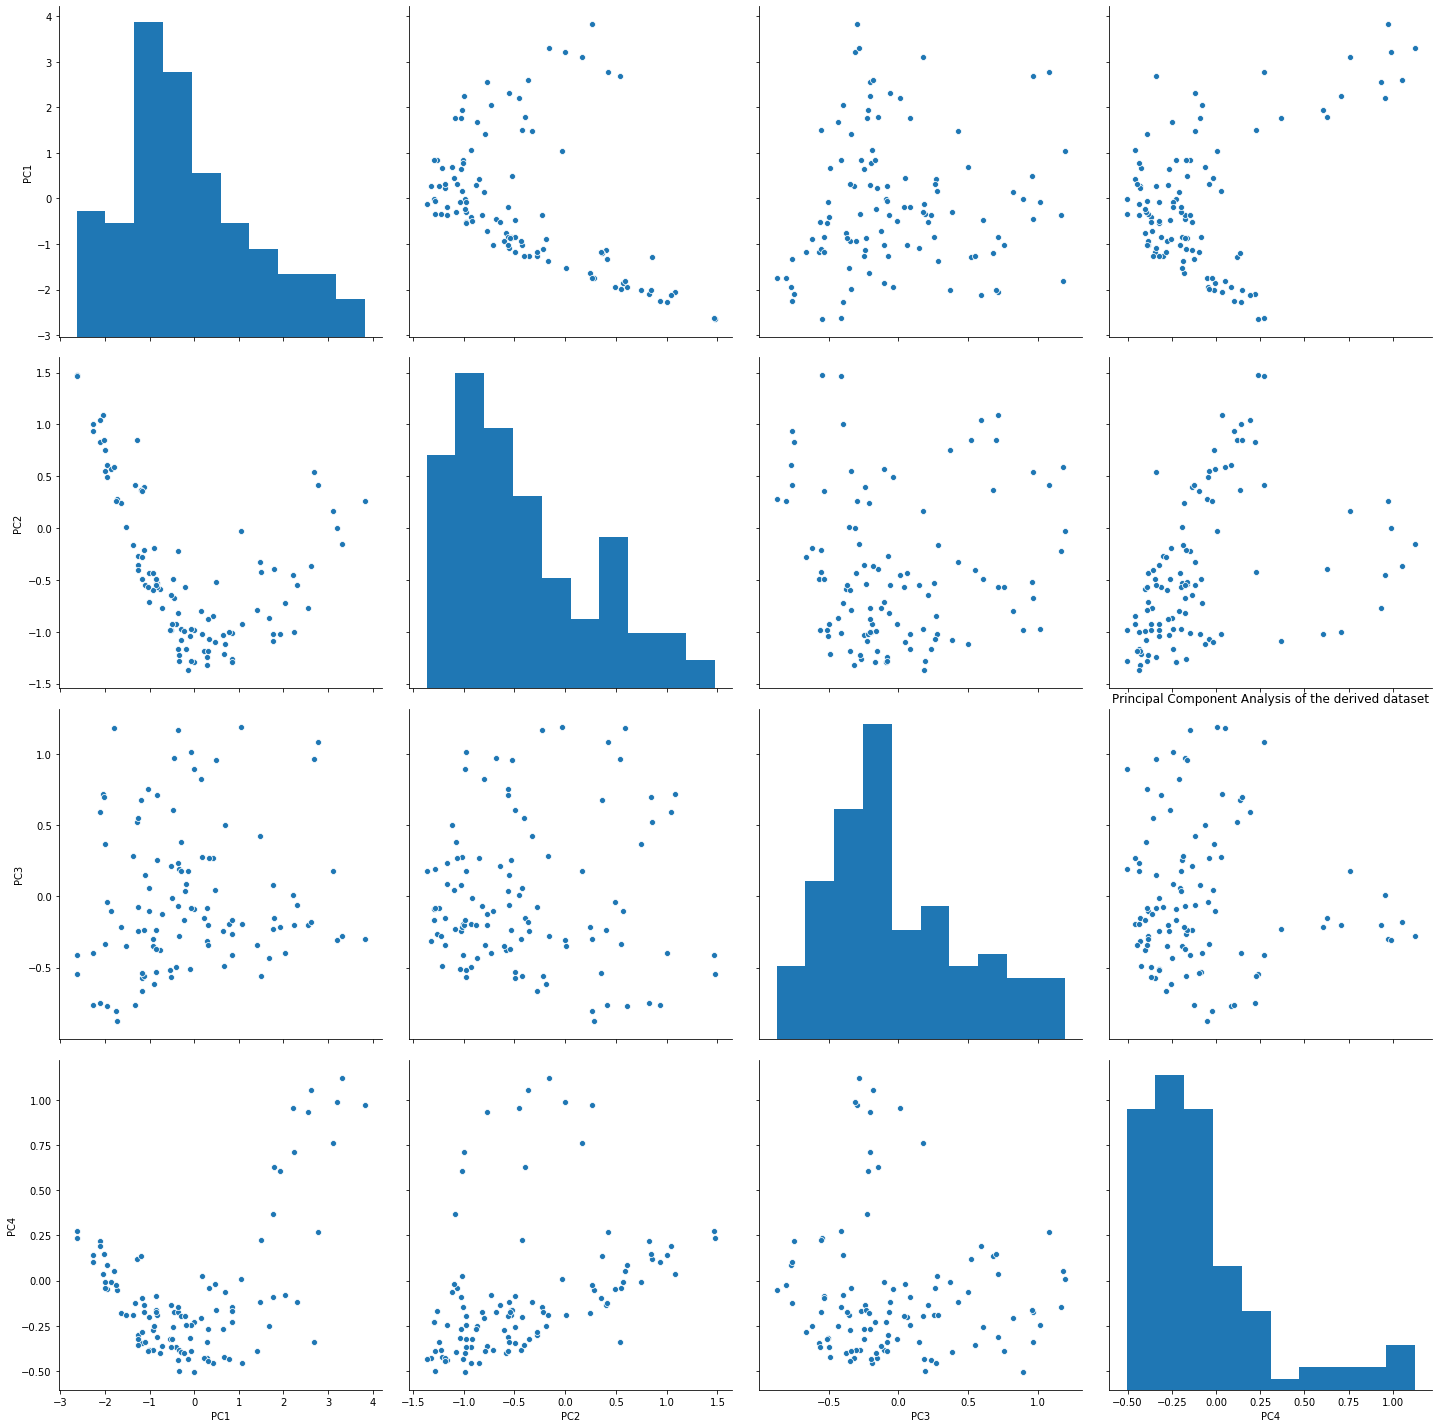

In [2428]:
plt.figure(figsize=(5,3)) 
sns.pairplot(data=df_final, size=5)
plt.title('Principal Component Analysis of the derived dataset')
plt.show()

# Modelling : Clustering

In [2429]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [2430]:
#Finding the value of Hopkins Statistics
hopkins(df_final.drop('country', axis=1))

0.8102383902209359

In [2431]:
#Creating a copy of df_final to be used for all clustering techniques separately
df_final_master=df_final.copy()

In [2432]:
y_km=df_final.pop('country')                        #Separating Country column in y_km
df_final_km=df_final                                #Placing the df_final dataframe without country into df_final_km

## K- Means Clustering

In [2433]:
#Importing the necessary libraries
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2434]:
# k-means with some arbitrary k and max_itertaions as 100
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(df_final_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [2435]:
#finding the labels for each row
kmeans.labels_

array([1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0,
       2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1,
       1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1])

### Finding the Optimal Number of Clusters

### SSD: Sum of Squares Distance

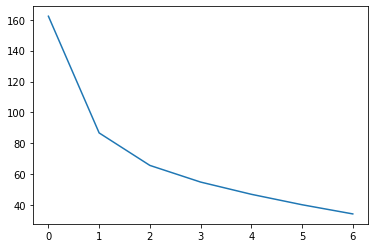

In [2436]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]                        #Defining a list of number of clusters to be chosen
for num_clusters in range_n_clusters:                           #Loop for spanning number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)       #Performing kmeans
    kmeans.fit(df_final_km)                                     #fitting
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

The curve shows steep bend till 2 which is number of clusters =3

### Silhouette Analysis

In [2437]:
#Library for silhouette score
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):                                                    #Loop for spanning number of clusters
    kmeans = KMeans(n_clusters=k).fit(df_final_km)                        #Performing k means and fitting
    sse_.append([k, silhouette_score(df_final_km, kmeans.labels_)])

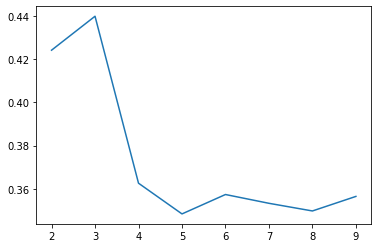

In [2438]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);                   #Plotting the silhoette values on a curve

In [2439]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df_final_km)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_final_km, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4369727297969931
For n_clusters=3, the silhouette score is 0.4398767528637817
For n_clusters=4, the silhouette score is 0.3684194556582908
For n_clusters=5, the silhouette score is 0.34938434281798253
For n_clusters=6, the silhouette score is 0.31297164955894674
For n_clusters=7, the silhouette score is 0.37198144866403954
For n_clusters=8, the silhouette score is 0.3558352112231246


For the Silhoutte analyis curve, the curve is steepest at n_clusters=3 so thats the final value

**As per the Elbow Curve method and Silhouette Analysis, its pretty much significant that the number of clusters to be taken are 3.
Lets proceed with n_clusters=3**

In [2440]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(df_final_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [2441]:
#Finding the labels
kmeans.labels_

array([0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2,
       1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0])

In [2442]:
# assign the label to a new column cluster_id
df_final_km['cluster_id'] = kmeans.labels_
df_final_km.head()                 #viewing the final dataframe df_final_km

,PC1,PC2,PC3,PC4,cluster_id
0,-2.636647,1.472085,-0.546500,0.237267,0
2,-0.459260,-0.678794,0.967852,-0.176389,2
4,0.648777,-1.026498,-0.244170,-0.267513,2
6,-0.334274,-1.279033,0.190772,-0.501435,2
8,3.818137,0.262614,-0.297336,0.974405,1


In [2443]:
#Concatenating the dataframe after k Means with the country column
df_final_kmeans=pd.concat([df_final_km,y_km],axis=1)

In [2444]:
#Viewing the final dataframe after merging with K Means
df_final_kmeans.head()

,PC1,PC2,PC3,PC4,cluster_id,country
0,-2.636647,1.472085,-0.546500,0.237267,0,Afghanistan
2,-0.459260,-0.678794,0.967852,-0.176389,2,Algeria
4,0.648777,-1.026498,-0.244170,-0.267513,2,Antigua and Barbuda
6,-0.334274,-1.279033,0.190772,-0.501435,2,Armenia
8,3.818137,0.262614,-0.297336,0.974405,1,Austria


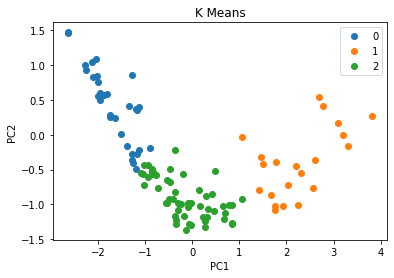

In [2445]:
#viewing the final clusters and their separation
groups = df_final_kmeans.groupby('cluster_id')           #grouping the datframe with cluster id

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['PC1'], group['PC2'], marker='o', linestyle='',label=name)
ax.legend()

#Setting the title, x and y labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K Means')
plt.show()

## Hierarchical Clustering

In [2446]:
#Viewing the dataframe df_final_master for further processing
df_final_master.head()

,PC1,PC2,PC3,PC4,country
0,-2.636647,1.472085,-0.546500,0.237267,Afghanistan
2,-0.459260,-0.678794,0.967852,-0.176389,Algeria
4,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda
6,-0.334274,-1.279033,0.190772,-0.501435,Armenia
8,3.818137,0.262614,-0.297336,0.974405,Austria


In [2447]:
#Creating copies of df_final_master into two dataframes: one for Single and other for complete linkage clustering
df_final_H1=df_final_master.copy()    #Single
df_final_H2=df_final_master.copy()    #Complete

In [2448]:
Z1=df_final_H1.pop('country')               #Country column for single linkage
Z2=df_final_H2.pop('country')               #Country column for complete linkage

In [2449]:
#viewing the dataframe for single linkage
df_final_H1.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
2,-0.459260,-0.678794,0.967852,-0.176389
4,0.648777,-1.026498,-0.244170,-0.267513
6,-0.334274,-1.279033,0.190772,-0.501435
8,3.818137,0.262614,-0.297336,0.974405


In [2450]:
#viewing the dataframe for complete linkage
df_final_H2.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
2,-0.459260,-0.678794,0.967852,-0.176389
4,0.648777,-1.026498,-0.244170,-0.267513
6,-0.334274,-1.279033,0.190772,-0.501435
8,3.818137,0.262614,-0.297336,0.974405


### Single Linkage

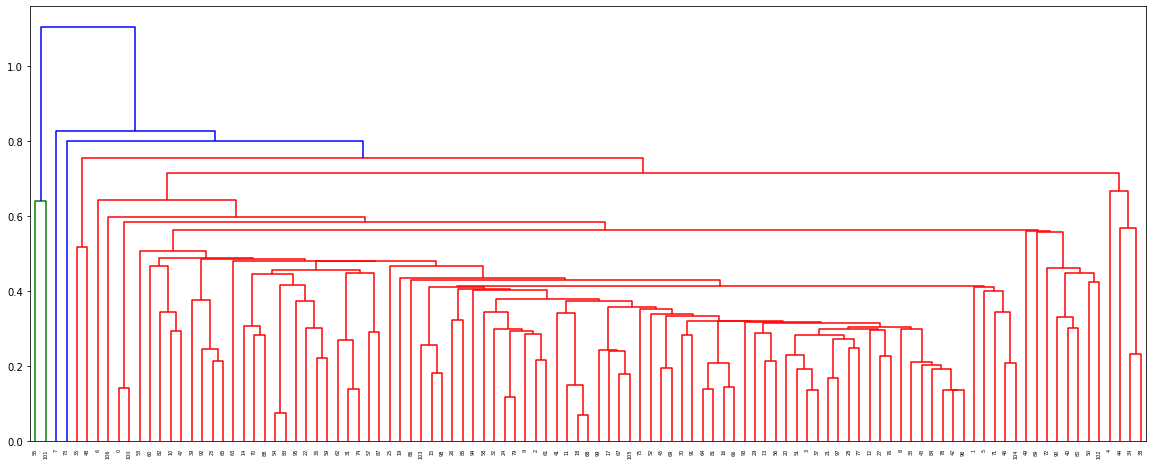

In [2451]:
# single linkage
plt.figure(figsize=(20,8))                                                 #Setting the figure size
mergings_1 = linkage(df_final_H1, method="single", metric='euclidean')     #Creating the mergings for single linkage
dendrogram(mergings_1)                                                     #Plotting linkages via a dendrogram
plt.show() 

If we cut the dedrogram below 0.8 for blue lines, we see the number of clusters as 4

In [2452]:
# 4 clusters for single linkage
cluster_labels_1 = cut_tree(mergings_1, n_clusters=4).reshape(-1, )          #Cutting the tree for 4 clusters
cluster_labels_1                                                             #Viewing the cluster labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0])

In [2453]:
# assign cluster labels
df_final_H1['cluster_labels_single'] = cluster_labels_1
df_final_H1.head()                       #viewing the dataframe df_final_H1

,PC1,PC2,PC3,PC4,cluster_labels_single
0,-2.636647,1.472085,-0.546500,0.237267,0
2,-0.459260,-0.678794,0.967852,-0.176389,0
4,0.648777,-1.026498,-0.244170,-0.267513,0
6,-0.334274,-1.279033,0.190772,-0.501435,0
8,3.818137,0.262614,-0.297336,0.974405,0


In [2454]:
#checking the dimensions of the dataframe df_final_H1
df_final_H1.shape

(107, 5)

In [2455]:
#Concatenating the final datframe after single linkage with the country column for single linkage to find the connection
df_final_single=pd.concat([df_final_H1,Z1], axis=1)

In [2456]:
#Viewing the final dataframe after single linkage including country
df_final_single.head()

,PC1,PC2,PC3,PC4,cluster_labels_single,country
0,-2.636647,1.472085,-0.546500,0.237267,0,Afghanistan
2,-0.459260,-0.678794,0.967852,-0.176389,0,Algeria
4,0.648777,-1.026498,-0.244170,-0.267513,0,Antigua and Barbuda
6,-0.334274,-1.279033,0.190772,-0.501435,0,Armenia
8,3.818137,0.262614,-0.297336,0.974405,0,Austria


In [2457]:
#viewing the dimensions of the dataframe df_final_single
df_final_single.shape

(107, 6)

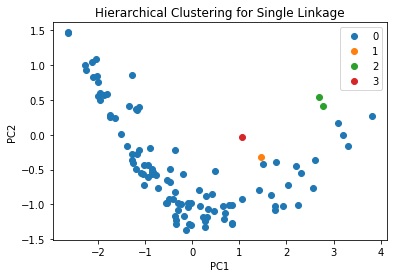

In [2458]:
#viewing the final clusters and their separation for single linkage hierarchical clustering
groups = df_final_single.groupby('cluster_labels_single')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['PC1'], group['PC2'], marker='o', linestyle='',label=name)
ax.legend()

#Assigning the title, x and y labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering for Single Linkage')
plt.show()

**As we can observe that the clustering k value for single linkage was 4, we cannot observe distinct clusters or differentiation so we reject single linkage hierarchical clustering**

### Complete Linkage

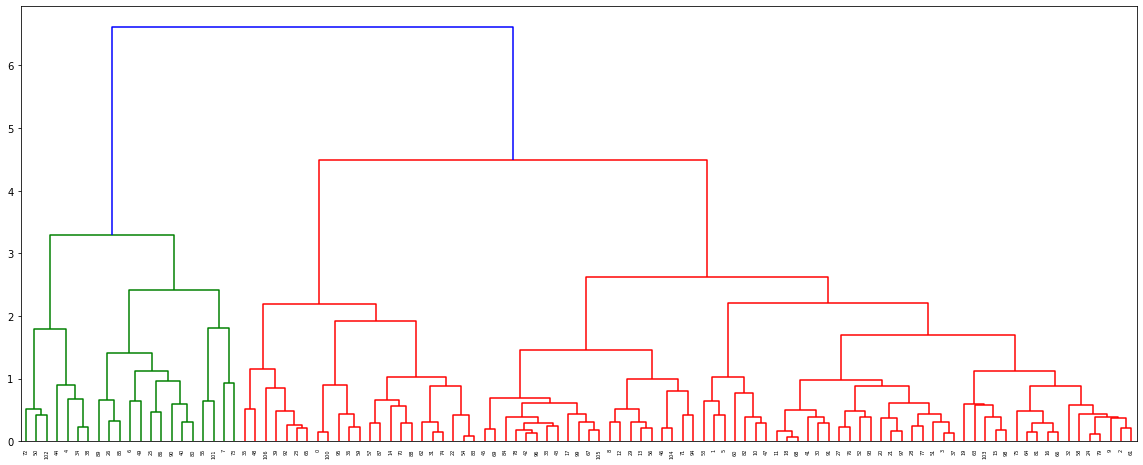

In [2459]:
# Complete linkage
plt.figure(figsize=(20,8))                                                      #Adjusting the figure size
mergings_2 = linkage(df_final_H2, method="complete", metric='euclidean')        #Creating the mergings for single linkage
dendrogram(mergings_2)                                                          #Plotting linkages via a dendrogram
plt.show()

If we cut the dedrogram at 5 for blue lines, we see the number of clusters as 2

In [2460]:
# 2 clusters for complete linkage
cluster_labels_2 = cut_tree(mergings_2, n_clusters=2).reshape(-1, )    #Cutting the tree for 4 clusters
cluster_labels_2                                                       #Viewing the cluster labels

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [2461]:
# assign cluster labels
df_final_H2['cluster_labels_complete'] = cluster_labels_2
df_final_H2.head()                                                     #viewing the dataframe df_final_H2

,PC1,PC2,PC3,PC4,cluster_labels_complete
0,-2.636647,1.472085,-0.546500,0.237267,0
2,-0.459260,-0.678794,0.967852,-0.176389,0
4,0.648777,-1.026498,-0.244170,-0.267513,0
6,-0.334274,-1.279033,0.190772,-0.501435,0
8,3.818137,0.262614,-0.297336,0.974405,1


In [2462]:
#checking the dimensions of the dataframe df_final_H2
df_final_H2.head()

,PC1,PC2,PC3,PC4,cluster_labels_complete
0,-2.636647,1.472085,-0.546500,0.237267,0
2,-0.459260,-0.678794,0.967852,-0.176389,0
4,0.648777,-1.026498,-0.244170,-0.267513,0
6,-0.334274,-1.279033,0.190772,-0.501435,0
8,3.818137,0.262614,-0.297336,0.974405,1


In [2463]:
#checking the dimensions of the dataframe df_final_H2
df_final_H2.shape

(107, 5)

In [2464]:
#Concatenating the final datframe after complete linkage with the country column for complete linkage to find the connection
df_final_complete=pd.concat([df_final_H2,Z2], axis=1)

In [2465]:
#Viewing the final dataframe after complete linkage including country
df_final_complete.head()

,PC1,PC2,PC3,PC4,cluster_labels_complete,country
0,-2.636647,1.472085,-0.546500,0.237267,0,Afghanistan
2,-0.459260,-0.678794,0.967852,-0.176389,0,Algeria
4,0.648777,-1.026498,-0.244170,-0.267513,0,Antigua and Barbuda
6,-0.334274,-1.279033,0.190772,-0.501435,0,Armenia
8,3.818137,0.262614,-0.297336,0.974405,1,Austria


In [2466]:
#viewing the dimensions of the dataframe df_final_complete
df_final_complete.shape

(107, 6)

#### Visualization for Complete Linkage Hierarchical Clustering

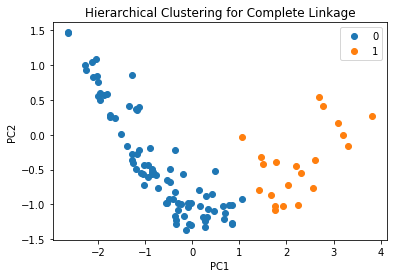

In [2467]:
#viewing the final clusters and their separation for complete linkage hierarchical clustering
groups = df_final_complete.groupby('cluster_labels_complete')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['PC1'], group['PC2'], marker='o', linestyle='',label=name)
ax.legend()

#Setting the title, x and y labels of the graph
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering for Complete Linkage')
plt.show()

#### Visualization for K Means

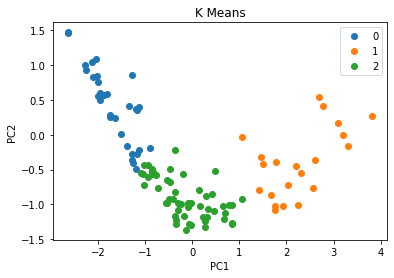

In [2468]:
#viewing the final clusters and their separation for k means clustering
groups = df_final_kmeans.groupby('cluster_id')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['PC1'], group['PC2'], marker='o', linestyle='',label=name)
ax.legend()

#Setting the title, x and y labels of the graph
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K Means')
plt.show()

#### K Means look better than Complete Linkage Hierarchical Clustering as per the distinct clusters shown in the graphs above, hence we will proceed with K Means Clustering for telling the final list of countries

## Cluster Profiling

In [2469]:
#Merging the initial dataframe df with the final dataframe obtained after preferred clustering which in our case is K Means
final_countries=pd.merge(df,df_final_kmeans,how='left',on='country')

In [2470]:
#viewing the dimensions of the dataframe final_countries
final_countries.shape

(167, 15)

In [2471]:
#viewing the dataframe final_countries
final_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,-2.636647,1.472085,-0.546500,0.237267,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,NaN,NaN,NaN,NaN,NaN
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,-0.459260,-0.678794,0.967852,-0.176389,2.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0.648777,-1.026498,-0.244170,-0.267513,2.0


In [2472]:
#Dropping the un-necessary columns PC1, PC2, PC3 and PC4 from the final list of columns
final_countries=final_countries.drop(['PC1','PC2','PC3','PC4'],axis=1)

In [2473]:
#Assigning the outlier developed countries with Cluster 3 Label to add them back
final_countries["cluster_id"].fillna(3, inplace = True)

In [2474]:
#Confirming the final list of countries
final_countries["cluster_id"].value_counts()

3.0    60
2.0    55
0.0    31
1.0    21
Name: cluster_id, dtype: int64

## Analysis of the clusters

In [2475]:
#Taking the mean of each numerical column of final_countries according to cluster ids & putting them into separate dataframes
ch_mor = pd.DataFrame(final_countries.groupby(["cluster_id"]).child_mort.mean())        #Child Mortality Mean
exp= pd.DataFrame(final_countries.groupby(["cluster_id"]).exports.mean())               #Exports Mean
imp =pd.DataFrame(final_countries.groupby(["cluster_id"]).imports.mean())               #Imports Mean
hea =pd.DataFrame(final_countries.groupby(["cluster_id"]).health.mean())                #Health Mean
inc =pd.DataFrame(final_countries.groupby(["cluster_id"]).income.mean())                #Income Mean
infl =pd.DataFrame(final_countries.groupby(["cluster_id"]).inflation.mean())            #Inflation Mean
life =pd.DataFrame(final_countries.groupby(["cluster_id"]).life_expec.mean())           #Life Expectancy Mean
tot_f =pd.DataFrame(final_countries.groupby(["cluster_id"]).total_fer.mean())           #Total Fertility Mean
gdpp =pd.DataFrame(final_countries.groupby(["cluster_id"]).gdpp.mean())                 #GDP per Person Mean

In [2476]:
#concatenating all the dataframes into a single dataframe for final comparison
df_compare = pd.concat([pd.Series([0,1,2,3]),ch_mor,exp,imp,hea,inc,infl,life,tot_f,gdpp], axis=1)
df_compare.columns = ["ClusterID","Child Mortality","Exports","Health","Imports","Income","Inflation","Life Expectancy","Total Fertility","GDPP"]
df_compare.head()                  #viewing the dataframe df_compare

,ClusterID,Child Mortality,Exports,Health,Imports,Income,Inflation,Life Expectancy,Total Fertility,GDPP
0,0,63.651613,861.023623,858.977519,128.778690,4450.000000,9.736452,63.329032,4.111935,2072.161290
1,1,5.738095,14300.409524,12960.300000,2562.558095,36833.333333,3.138190,79.147619,1.803810,30957.142857
2,2,20.894545,2742.936000,2896.436618,408.256302,12297.636364,6.435836,73.245455,2.320545,6467.418182
3,3,52.470000,12689.692253,10702.603083,1603.574818,21255.716667,9.631050,68.816667,3.322167,18249.483333


**As per the stats, its clear that Cluster 2 stands out from all other clusters in terms of every figure. Hemce, it represents the countries in need of immediate help. Lets confirm this via graphs as well.**

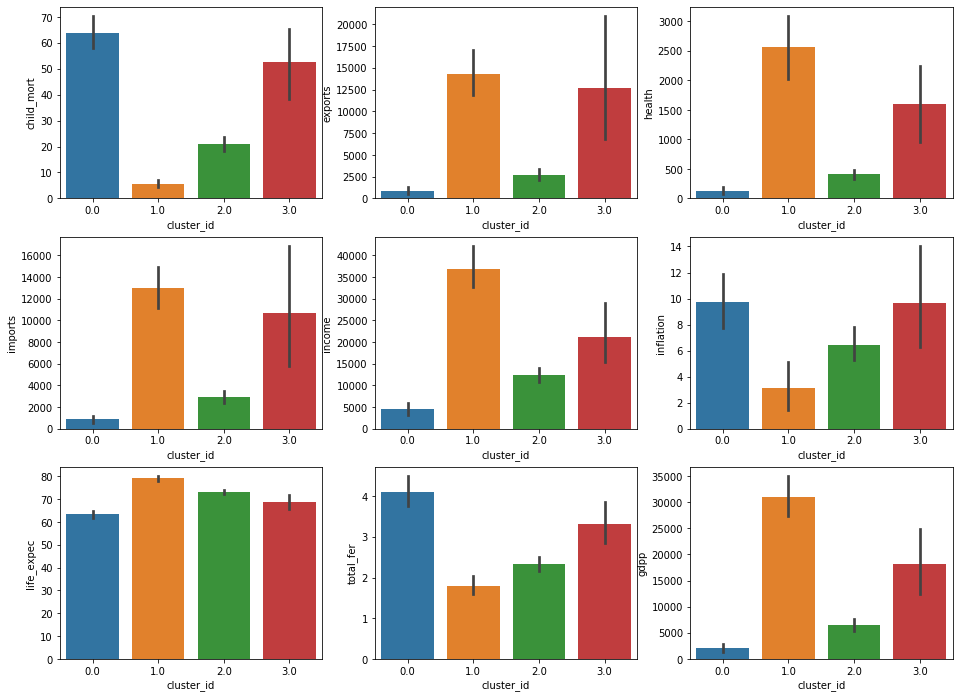

In [2477]:
#Adjusting the figure size
fig, axs = plt.subplots(3,3,figsize = (16,12))

#Plotting each attribute with cluster id
sns.barplot(x=final_countries.cluster_id, y=final_countries.child_mort,ax = axs[0,0])
sns.barplot(x=final_countries.cluster_id, y=final_countries.exports,ax = axs[0,1])
sns.barplot(x=final_countries.cluster_id, y=final_countries.health,ax = axs[0,2])
sns.barplot(x=final_countries.cluster_id, y=final_countries.imports,ax = axs[1,0])
sns.barplot(x=final_countries.cluster_id, y=final_countries.income,ax = axs[1,1])
sns.barplot(x=final_countries.cluster_id, y=final_countries.inflation,ax = axs[1,2])
sns.barplot(x=final_countries.cluster_id, y=final_countries.life_expec,ax = axs[2,0])
sns.barplot(x=final_countries.cluster_id, y=final_countries.total_fer,ax = axs[2,1])
sns.barplot(x=final_countries.cluster_id, y=final_countries.gdpp,ax = axs[2,2])
plt.show()

**From the Dataframe and the graphs, its confirm that Cluster 2 countries are in dire need of help**

The cluster number may differ with each run so wen need  to take the lowest one from graph everytime

In [2486]:
#Taking the countries into a separate dataframe for study
final_countries_Cluster1=final_countries[final_countries['cluster_id']==0]

In [2487]:
#Fidning the count of immediate help countries
print(len(final_countries_Cluster1['country']))

31


#### Countries in dire need of aid $$

In [2488]:
print(final_countries_Cluster1['country'].values)

['Afghanistan' 'Botswana' 'Cambodia' 'Comoros' 'Congo, Rep.' 'Eritrea'
 'Gabon' 'Gambia' 'Ghana' 'India' 'Iraq' 'Kenya' 'Lao' 'Liberia'
 'Madagascar' 'Mauritania' 'Micronesia, Fed. Sts.' 'Myanmar' 'Namibia'
 'Nepal' 'Pakistan' 'Rwanda' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tajikistan' 'Tanzania' 'Turkmenistan' 'Uganda' 'Vanuatu' 'Yemen']


In [2489]:
final_countries_Cluster1['country'].to_frame()

,country
0,Afghanistan
21,Botswana
27,Cambodia
36,Comoros
38,"Congo, Rep."
50,Eritrea
55,Gabon
56,Gambia
59,Ghana
69,India


In [2490]:
#Countries with lowest income and gdpp
final_countries_Cluster1.sort_values(by=['gdpp','income'],ascending=True).reset_index().drop('index',axis=1).head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Liberia,89.3,62.45700,38.5860,302.802000,700.0,5.47,60.8,5.02,327.0,0.0
1,Madagascar,62.2,103.25000,15.5701,177.590000,1390.0,8.79,60.8,4.60,413.0,0.0
2,Eritrea,55.2,23.08780,12.8212,112.306000,1420.0,11.60,61.7,4.61,482.0,0.0
3,Afghanistan,90.2,55.30000,41.9174,248.297000,1610.0,9.44,56.2,5.82,553.0,0.0
4,Gambia,80.3,133.75600,31.9778,239.974000,1660.0,4.30,65.5,5.71,562.0,0.0
5,Rwanda,63.6,67.56000,59.1150,168.900000,1350.0,2.61,64.6,4.51,563.0,0.0
6,Nepal,47.0,56.71360,31.0800,215.488000,1990.0,15.10,68.3,2.61,592.0,0.0
7,Uganda,81.0,101.74500,53.6095,170.170000,1540.0,10.60,56.8,6.15,595.0,0.0
8,Tanzania,71.9,131.27400,42.1902,204.282000,2090.0,9.25,59.3,5.43,702.0,0.0
9,Tajikistan,52.4,109.96200,44.1324,432.468000,2110.0,12.50,69.6,3.51,738.0,0.0


#### Child Mortality for Countries

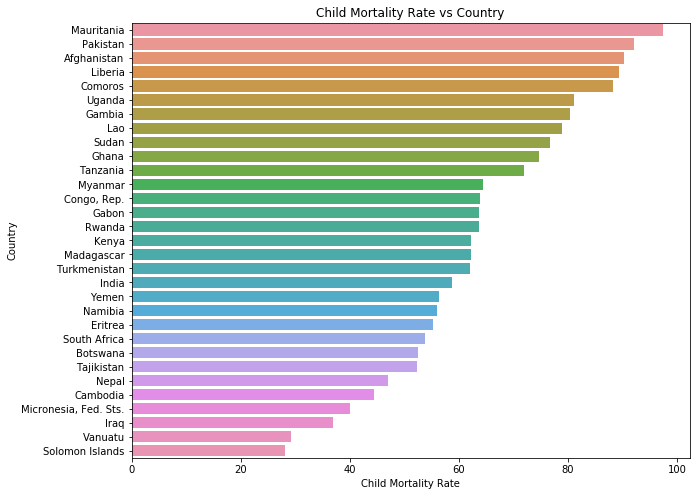

In [2491]:
plt.figure(figsize=(10, 8))                                 
countries_child_mortality = final_countries_Cluster1[['country','child_mort']].sort_values('child_mort', ascending = False)
plt1 = sns.barplot(y='country', x='child_mort', data= countries_child_mortality)                             
plt.title('Child Mortality Rate vs Country')                                                          
plt1.set(xlabel = 'Child Mortality Rate', ylabel= 'Country')                  
plt.show()

#### Income for Countries

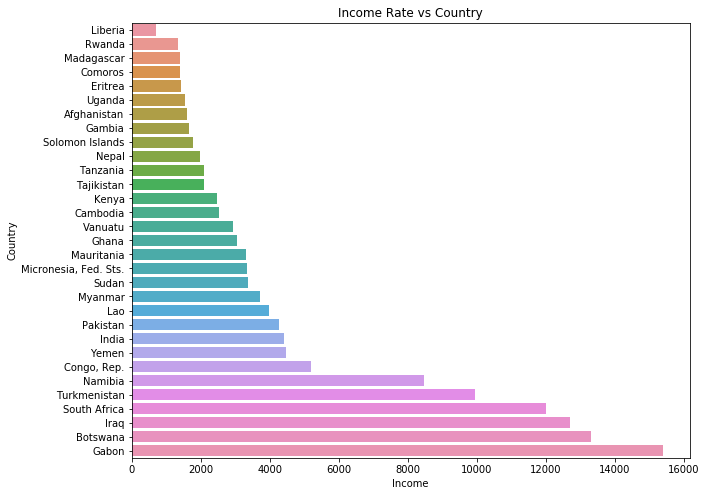

In [2492]:
plt.figure(figsize=(10, 8))
countries_income = final_countries_Cluster1[['country','income']].sort_values('income', ascending = True)
plt1 = sns.barplot(y='country', x='income', data= countries_income)                             
plt.title('Income Rate vs Country')                                                          
plt1.set(xlabel = 'Income', ylabel= 'Country')                  
plt.show()

#### GDP Per Person for Countries

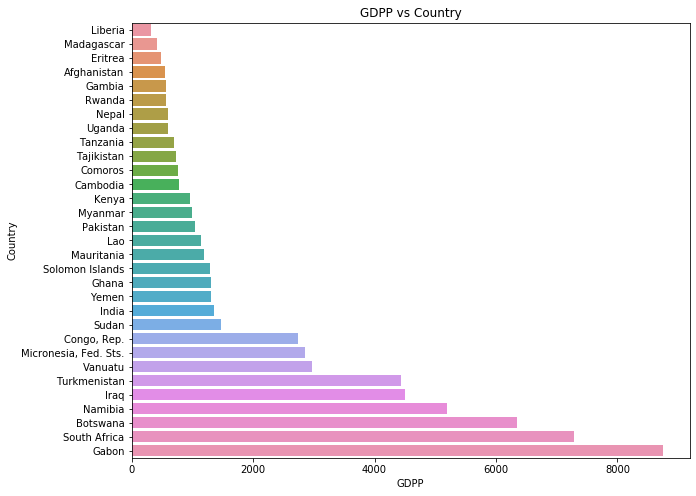

In [2493]:
plt.figure(figsize=(10, 8))
countries_gdpp = final_countries_Cluster1[['country','gdpp']].sort_values('gdpp', ascending = True)
plt1 = sns.barplot(y='country', x='gdpp', data= countries_gdpp)                             
plt.title('GDPP vs Country')                                                          
plt1.set(xlabel = 'GDPP', ylabel= 'Country')                  
plt.show()

## **End of Case Study**